# ABM Evacuation model

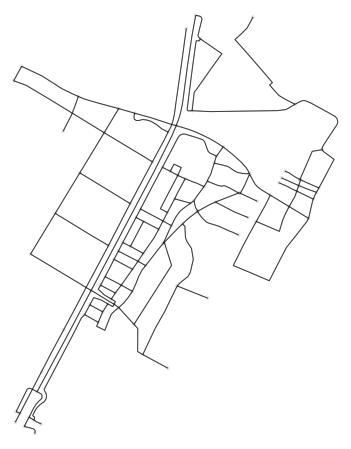

In [1]:
import env
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

aos_file = f'./data/arahama_aos.geojson'
gdf = gpd.read_file(aos_file)
bbox = gdf.total_bounds
aos_bbox = {'north': bbox[3], 'south': bbox[1],
    'east': bbox[2], 'west': bbox[0]}
E = env.Environment(bbox=aos_bbox)
E.e_project_network(crs=32654)
E.e_get_network_projection(graph=E.e_Gp)
fig,ax = E.e_plot()

In [ ]:
# Adjust Area of Study Polygon
import geopandas as gpd
import folium
from shapely.geometry import Polygon

crs = 'epsg:4326'
y_lats = [38.208400, 38.231377, 38.231377, 38.208400]
x_lons = [140.945666, 140.945666, 140.995171, 140.995171]
polygon_geom = Polygon(zip(x_lons, y_lats))
aos = gpd.GeoDataFrame(index=[0], crs=crs, geometry=[polygon_geom])
m = folium.Map([38.214146, 140.945666,],zoom_start=13, zoom_control=True, tiles='cartodbpositron')
folium.GeoJson(aos).add_to(m)
m

Your graph has this projection: epsg:32654


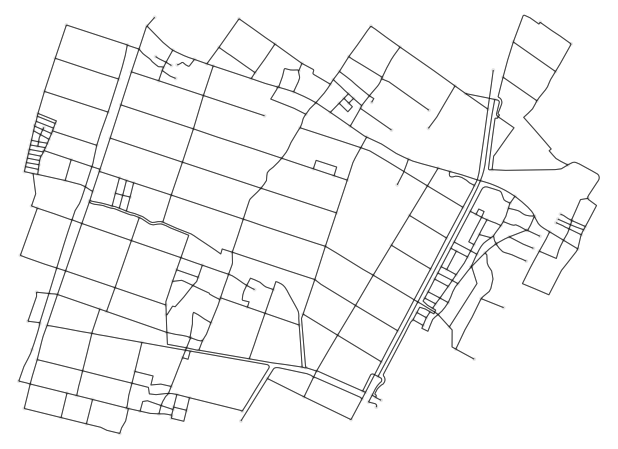

In [31]:
import env
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

bbox = aos.total_bounds
aos_bbox = {'north': bbox[3], 'south': bbox[1],
    'east': bbox[2], 'west': bbox[0]}
E = env.Environment(bbox=aos_bbox)
E.e_project_network(crs=32654)
E.e_get_network_projection(graph=E.e_Gp)
fig,ax = E.e_plot()

In [5]:
import osmnx as ox
edge_attr = ox.graph_to_gdfs(E.e_G, nodes=False)

In [43]:
ox.stats.intersection_count(E.e_G,min_streets=3)
ox.stats.streets_per_node_avg(E.e_G)

3.11144578313253

In [ ]:
#start a case
C = Model(hospitals=0,ambulances=4,injuries=3000,
          saveplot=True,width=10,height=10,dpi=100,labels=False,
          tsunami=True,verb=False)

In [ ]:
#run the case
C.go(sim_time=1*3600,saveplot=True,width=10,height=10,
     dpi=100,video=True,fps=1,verb=False)